<a href="https://colab.research.google.com/github/Aakash9393/Telecom-Churn-Analysis-/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

**Reading the Data in our collab notebook and importing required Packages**

In [2]:
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the file
from google.colab import drive
drive.mount('/content/drive')

file_path="/content/drive/MyDrive/Colab Notebooks/Capstone Project - Telecom Churn/Telecom Churn.csv"
telecom_df=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Study more about the data**

In [ ]:
# Viewing the data of top 5 rows to look the glimps of the data
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
#Getting the shape of dataset with rows and columns
print(telecom_df.shape)

(3333, 20)


In [ ]:
#Getting all the columns
print("Columns of the dataset:")
telecom_df.columns

Columns of the dataset:


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
#check details about the data set
telecom_df.info()
#we see that we have 3333 entries and no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**As seen from the above table there is no null value so data cleaning is not required for this data set.**

In [12]:
# Checking missing values in the data set
telecom_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**As seen from above table there are no missing values in our data set so there is no need to do further operations on it.**

In [ ]:
#Looking for the description of the dataset to get insights of the data
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**As seen from above table mean and median are almost same for numerical comlumns so our data is balanced for this data set.**

`**Exploratory Data Analysis Of The Data Set**



**1. Analyzing "Customer service calls" column with Churn Column**

In [ ]:
#Printing the data of customer service calls 
telecom_df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
#Calculating the Customer service calls vs Churn percentage
Customer_service_calls_data = pd.crosstab(telecom_df['Customer service calls'],telecom_df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


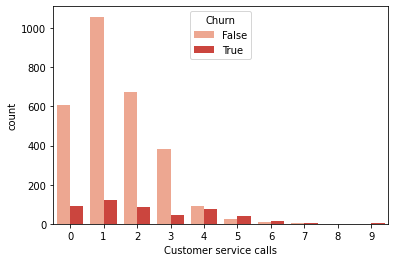

In [ ]:
#Analysing using countplot
sns.countplot(x='Customer service calls',hue="Churn",data = telecom_df,palette="Reds")


***It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.***

***The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,***

***And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.***

***So operator should work to improve the service call.***

**2. Analysing the Churn column of the data Set**

In [ ]:
#Printing the unique value inside "churn" column
telecom_df["Churn"].unique()

array([False,  True])

In [ ]:
#Printing the count of true and false in 'churn' column
print(telecom_df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


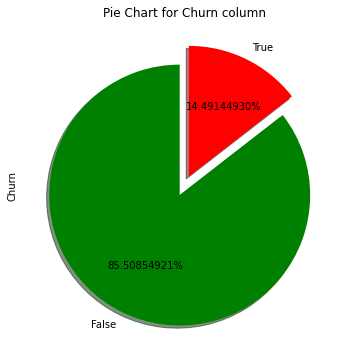

In [ ]:
#To get the pie chart to analyze churn
telecom_df ['Churn'].value_counts().plot.pie(explode=[0.08,0.08], autopct='%0.8f%%', startangle=90,shadow=True,colors='green',figsize=(6,6))
plt.title('Pie Chart for Churn column')
plt.show()

**After analyzing the churn column, we had little to say like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with churn**

**3. Analysing the State Column of data set with Churn Column**

In [ ]:
#printing the unique value of sate column
telecom_df['State'].nunique()



51

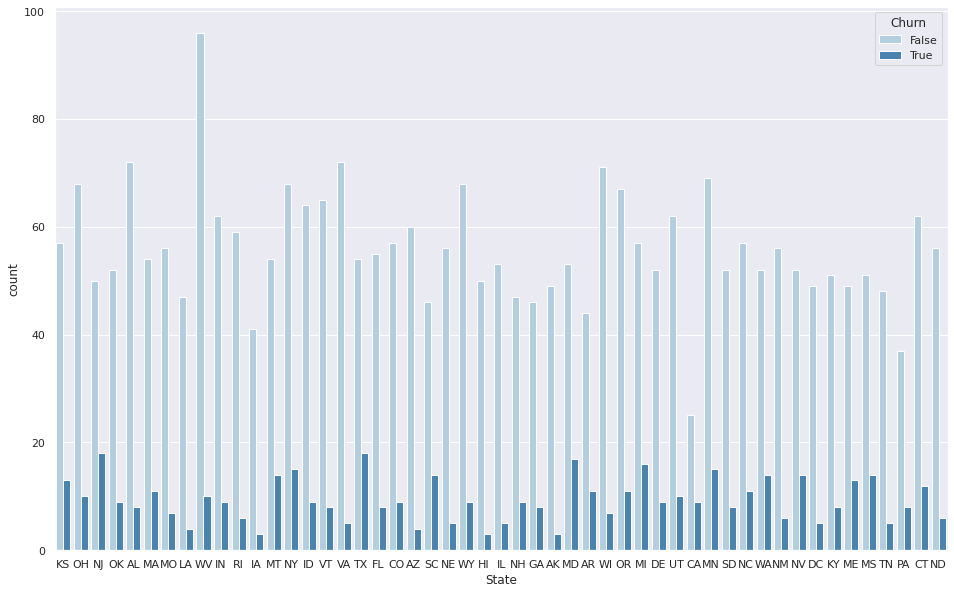

In [ ]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(16,10))
ax = sns.countplot(x='State', hue="Churn", data=telecom_df,palette='Blues')
plt.show()


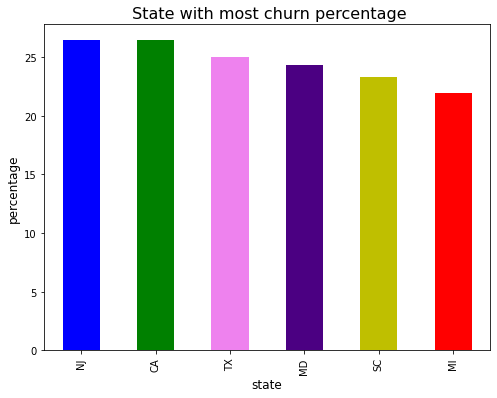

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((telecom_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['b','g','violet','indigo','y','r','orange'])
plt.title(" State with most churn percentage", fontsize = 16)
plt.xlabel('state', fontsize = 12)
plt.ylabel('percentage', fontsize = 12)
plt.show()

In [ ]:
#calculate State vs Churn percentage
State_data = pd.crosstab(telecom_df["State"],telecom_df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [ ]:
#show the most churn state of top 10 by ascending the above list
telecom_df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)


State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

***There is 51 unique state present who have different churn rate.*** 

***From the above analysis CA, NJ, TX, MD, SC, MI are the ones who have a higher churn rate of more than 21.***

 ***The reason for this churn rate from a particular state may be due to the low coverage of the cellular network.***



**4. Analysing Area Code column with churn column**







In [ ]:
#calculate Area code vs Churn percentage
Area_code_data = pd.crosstab(telecom_df["Area code"],telecom_df["Churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


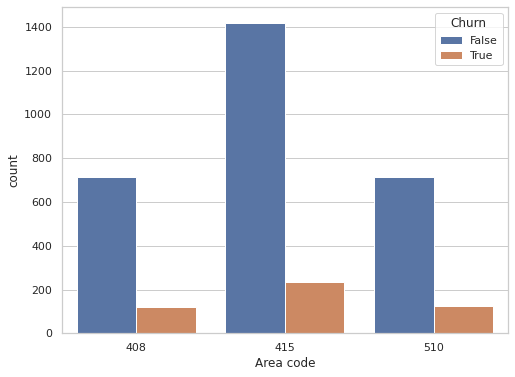

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Area code', hue="Churn", data=telecom_df)
plt.show()

***In the above data, we notice that there is only 3 unique value are there i.e408,415,510 and the churn count of area code 415 is higher than other area codes so need to pay more attention in this area code regarding good service to customer and see that company signal network remains good in this area may be because of weak signal customer are leaving our company. **bold text**

**5. Analyzing "International Plan" column with Churn**




In [ ]:
#Show count value of 'yes','no'
telecom_df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
#Show the unique data of "International plan"
telecom_df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(telecom_df["International plan"],telecom_df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


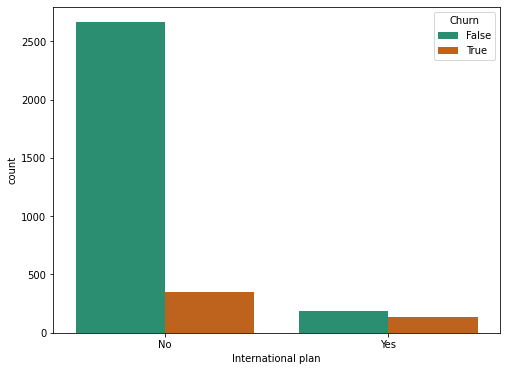

In [ ]:
#Analysing by using countplot
sns.countplot(x='International plan',hue="Churn",data = telecom_df,palette='Dark2')

***From the above data we get***

***There are 3010 customers who  dont have a international plan.***

***There are 323 customers who have a international plan.***

***Among those who have a international plan 42.4 % people churn.***

***Whereas among those who dont have a international plan only 11.4 % people churn.***

***So basically the people who bought International plans are churning in big numbers.***

***Probably because of connectivity issues or high call charge.***

**6.Analyzing "Voice Mail Plan" column with Churn Column**

In [ ]:
#show the unique value of the "Voice mail plan" column
telecom_df["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Calculate the Voice Mail Plan vs Churn percentage
Voice_mail_plan_data = pd.crosstab(telecom_df["Voice mail plan"],telecom_df["Churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


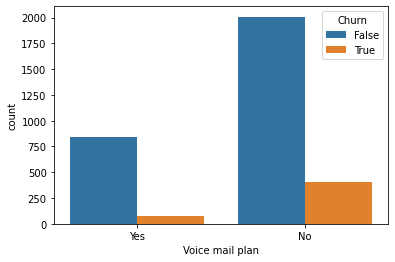

In [16]:
#Analysing by using countplot
sns.countplot(x='Voice mail plan',hue="Churn",data = telecom_df)

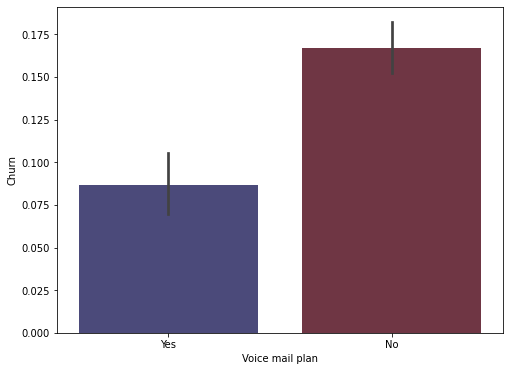

In [ ]:
#Analysing by using countplot

sns.barplot(x='Voice mail plan', y='Churn', data=telecom_df,palette="icefire")

**In Voice mail plan column,after analysis it is found that Churn rate is low for people with voice mail plan.**

**7. Analyzing Account Length Column with churn column**

In [6]:
telecom_df.groupby('Churn').agg({'Account length':'mean'})

,Account length
Churn,
False,100.793684
True,102.664596


Text(0.5, 0, 'Account length')

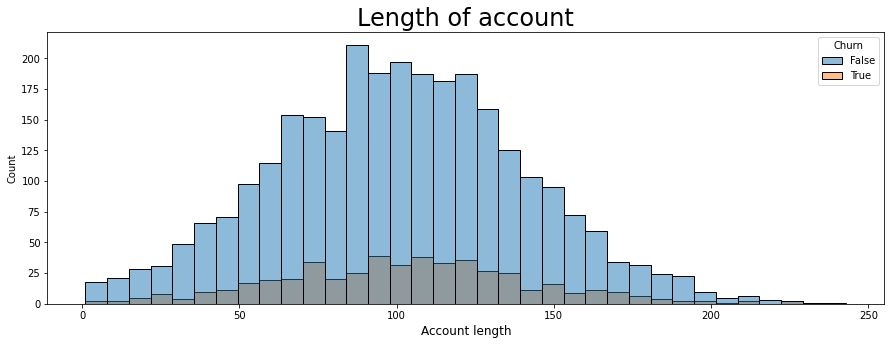

In [14]:
fig, ax = plt.subplots(figsize = (15, 5 ))
sns.histplot(data=telecom_df,x='Account length',hue="Churn")
ax.set_title( "Length of account" , size = 24 )
ax.set_xlabel( "Account length" , size = 12 )

**The above data analysis shows that even the customer with higher account length is also churning which must be avoided primarily.**


**8. Analyzing all calls minutes,all calls, all calls charge together**


In [ ]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_perm = telecom_df['Total day charge'].mean()/telecom_df['Total day minutes'].mean()
eve_charge_perm = telecom_df['Total eve charge'].mean()/telecom_df['Total eve minutes'].mean()
night_charge_perm = telecom_df['Total night charge'].mean()/telecom_df['Total night minutes'].mean()
int_charge_perm= telecom_df['Total intl charge'].mean()/telecom_df['Total intl minutes'].mean()

In [ ]:
print([day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

[0.17000300739130672, 0.08500104871485778, 0.04500041448440008, 0.2700500279887107]


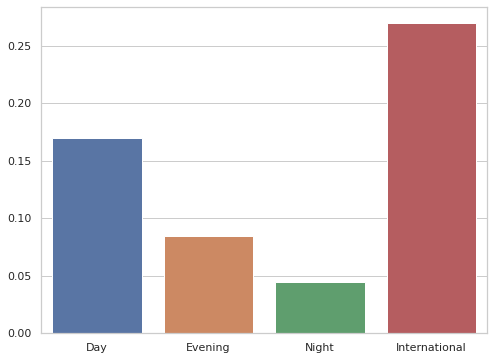

In [ ]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm,])

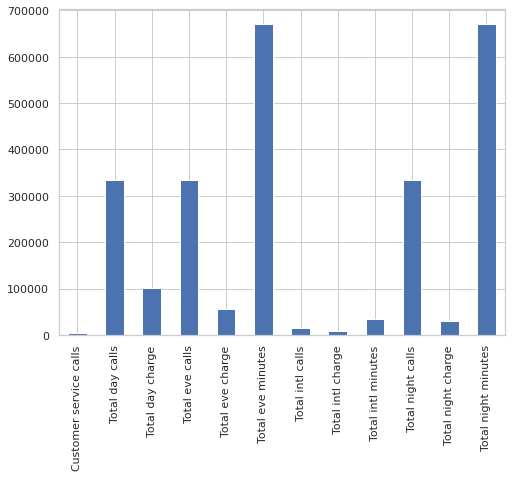

In [ ]:
call_analysis =telecom_df.iloc[:, 7:19].sum().sort_index()
visual_2 = call_analysis.plot.bar()


***After analyzing the above dataset we have noticed that total day/night/eve minutes/call/charges are not put any kind of cause for churn rate. But international call charges are high as compare to others it's an obvious thing but that may be a cause for international plan customers to churn out.***

**9.Now we are checking corelation between columns**

Text(0.5, 1.0, 'Correlations between variables')

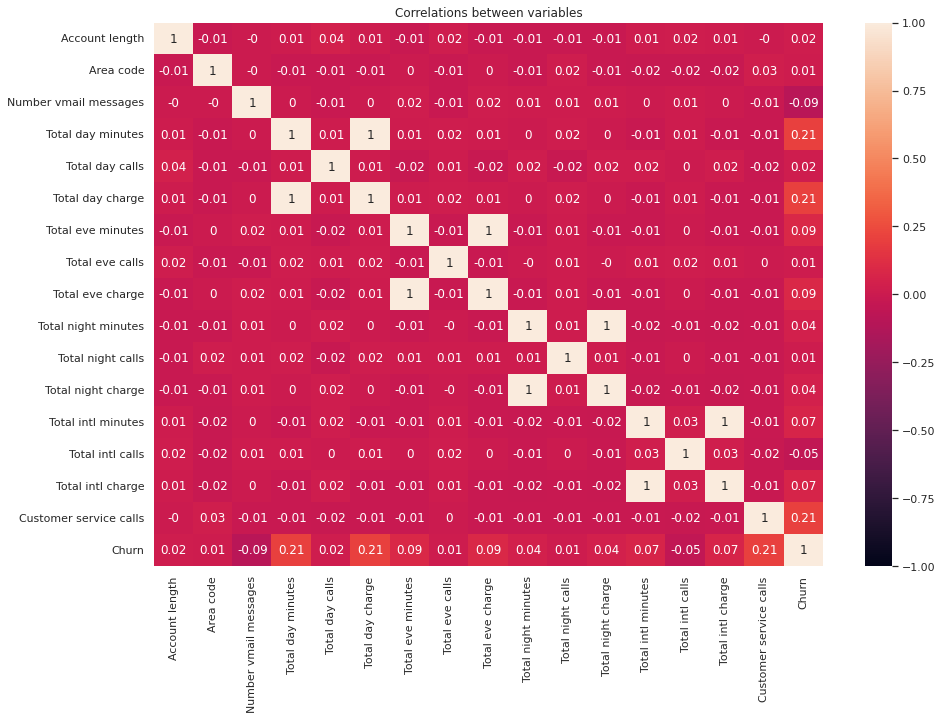

In [ ]:
corr=telecom_df.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(corr,vmin=-1,annot = True)
plt.title('Correlations between variables')




**From above graph we can see strong correlation between the below variables:**



1.   Total day minutes vs total day charge
2.   Total eve minues vs total eve charge
3.   Total night minutes vs total night charge
4.   Total intl minutes vs total intl charg 


**Conclusion**:
**After doing data analysis on our data set we have drawn below conclusions:-** 

1.  **In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.**

2.  **After analysing the churn column it is found that almost 15% of customers have churned in totally.**

3.  **There are some states where the churn rate is high as compared to others may be due to low network coverage.**

4.  **In Area code column we notice that there is only 3 unique value are there i.e408,415,510 and the churn count of area code 415 is higher than other area codes so need to pay more attention in this area code regarding good service to customer and see that company network remains good in this area,may be because of weak network customer are leaving the company.**

5.  **In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge**

6. **In the voice mail section churning is low with customers having voice mail plan**

7. **After performing data analysis on account length column, it shows that even the customer with higher account length is also churning which must be avoided primarily.**

8.   **After analyzing the total day/night/eve minutes/call/charges are not put any kind of cause for churn rate. But international call charges are high as compare to others it's an obvious thing but that may be a cause for international plan customers to churn out**

9. **we have shown corelation of different variables with the help of heatmap and after analysis we found that there is strong corelation between below variables** 
  **Total day minutes vs total day charge,Total eve minues vs total eve       charge,Total night minutes vs total night charge,Total intl minutes vs total   intl charge.** 



 

**From above data analysis there are some recomendations for the company:-**


**1. The company needs to look into their Customer base in states like CA, NJ, TX, SC, MD and figure out what sort of issues the customers are facing.**

**2. They also need to look into the International plan they offer their customer and services related to that and try to figure out what the customers are not happy about.**

**3. Next important thing the company needs to do is improve their customers service call handling. Customers who call relatively more times to Customer Service are the ones that are terminating the subscription**

**4. In area code 415 churn rates of customer are higher than other area codes so company needs to figure out what sort of issues the customers are facing like weak network issue in that area due to less telecom signal towers present in that area of that company.**

**5. Periodically throw Offers to retain domestic and specially international customers.**

